<a href="https://colab.research.google.com/github/dbabrams/applied_hydro/blob/master/Prob_Set_3_Key.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Aquifer Test Analysis for Okawville #4

## <center>Part I: Background Information About Okawville

In late 1980s the Village of Okawville, Illinois experienced a large increase in the concentrations of chloride, hardness, and sulfate in supply well `#4`, one of two principal supply wells for the community. A subsequent investigation found that the aquifer was contaminated by brines spilled at the surface from oil drilling operations.  A resistivity survey was conducted by the Illinois State Geological Survey to determine the extent of the brine contamination.  The village wells are constructed in an alluvial sand aquifer that occupies the flood plain of modern Kaskaskia River valley. The existing wells are 500 feet from the valley wall which acts as a flow barrier.



In search of uncontaminated water, the Village drilled a test well two miles to the west at a new well site. The Illinois State Water Survey then conducted an aquifer test to determine aquifer properties. The results of this analysis are shown below.

## <center>Part II: Import Python Packages

This analysis was conducted using Python the following Python packages. Details of the packages are commented below.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo
import scipy.special as sps

# howdy doody


## <center>Part III: Import and plot the data

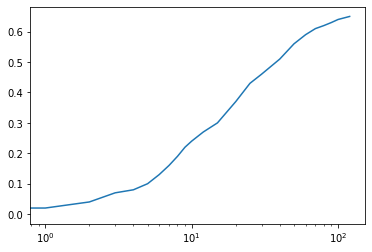

In [0]:
df_dd = pd.read_excel('/content/drive/My Drive/trail_by_fire/Okawville_MW_AquiferTest.xlsx', index_col=0)
plt.semilogx(df_dd)

## <center>Part IV: Jacob Straight Line Method

-0.22616123157989565
0.4611271782040228
The Jacob Straight Line Method indicates that T is 2.1297770700636938 ft^2/min and S is 0.016505772292993628 .
The Jacob Straight Line Method indicates that T is 3066.878980891719 ft^2/day and S is 0.016505772292993628 .


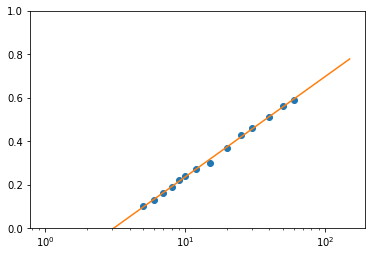

In [0]:
dd = df_dd.dtw[5:-5]

def log_line(x, a, b):
    return a + b*np.log10(x)

# curve_fit(user defined equation, x variable, y variable, convergence criteria)
# popt is an array with the first value being the y-intersect and the second value being the slope of the line
# pcov is the covariance of popt. We will not be using that.
popt, pcov = spo.curve_fit(log_line, dd.index, dd, p0=(1, 1))

xx = [value for value in range(1,151)]
yy = log_line(xx, popt[0], popt[1])

plt.semilogx(dd,'o', xx, yy)
plt.ylim([0,1])


a = popt[0]
b = popt[1]
print(a)
print(b)
xint = 10**(-a/b)

T = 2.3*5.35/(4*3.14*(0.46))
S = 2.25*T*3.1/30/30
# do not print T or S beyond three significant figures
print('The Jacob Straight Line Method indicates that T is',T,'ft^2/min and S is',S,'.')
print('The Jacob Straight Line Method indicates that T is',T*60*24,'ft^2/day and S is',S,'.')

## <center>Part V: Theis Curve Fitting

[0.01328024 2.40073433]


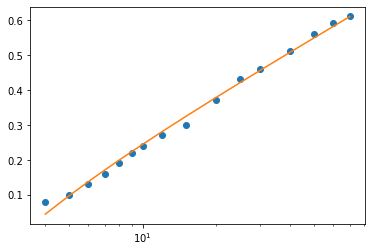

In [0]:
time = df_dd.index[4:-4]
dd = df_dd.dtw[4:-4]

def theis(t, S, T):
    return -5.35/(4*3.14*T)*sps.expi(30**2*S/(4*T*t))

# curve_fit(user defined equation, x variable, y variable, convergence criteria)
# popt is an array with the first value being the y-intersect and the second value being the slope of the line
# pcov is the covariance of popt. We will not be using that.
popt, pcov = spo.curve_fit(theis, time, dd, p0=(0.0000000000000000000001, 0.0000000000000001))

dd_model = -5.35/(4*3.14*popt[1])*sps.expi(30*30*popt[0]/(4*popt[1]*time))
plt.semilogx(time,dd,'o')
plt.plot(time,dd_model)

print(popt)

In [0]:
# do not print T or S beyond three significant figures
print('The Jacob Straight Line Method indicates that T is',popt[1],'ft^2/min and S is',popt[0],'.')
print('The Jacob Straight Line Method indicates that T is',popt[1]*60*24,'ft^2/day and S is',popt[0],'.')

The Jacob Straight Line Method indicates that T is 2.400734333580618 ft^2/min and S is 0.013280240366508217 .
The Jacob Straight Line Method indicates that T is 3457.0574403560904 ft^2/day and S is 0.013280240366508217 .


## <center>Part VI: Hydraulic Conductivity and Specific Storage

In [0]:
H = 45
kfm = popt[1]/H
kfd = popt[1]*60*24/H
print('k ft/min =',kfm)
print('k ft/day =',kfd)

k ft/min = 0.05334965185734707
k ft/day = 76.82349867457978


In [0]:
ss = popt[0]/H
print('ss 1/ft =',ss)

ss 1/ft = 0.00029511645258907147
